In [7]:
import random
import time
import matplotlib.pyplot as plt

In [8]:
# Standard matrix multiplication
def standard_matrix_multiplication(A, B):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Optimized block matrix multiplication
def block_matrix_multiplication(A, B, block_size):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(0, n, block_size):
        for j in range(0, n, block_size):
            for k in range(0, n, block_size):
                # Block multiplication with temporary sub-matrix to reduce cache misses
                for ii in range(i, min(i + block_size, n)):
                    for kk in range(k, min(k + block_size, n)):
                        temp = A[ii][kk]
                        for jj in range(j, min(j + block_size, n)):
                            C[ii][jj] += temp * B[kk][jj]
    
    return C

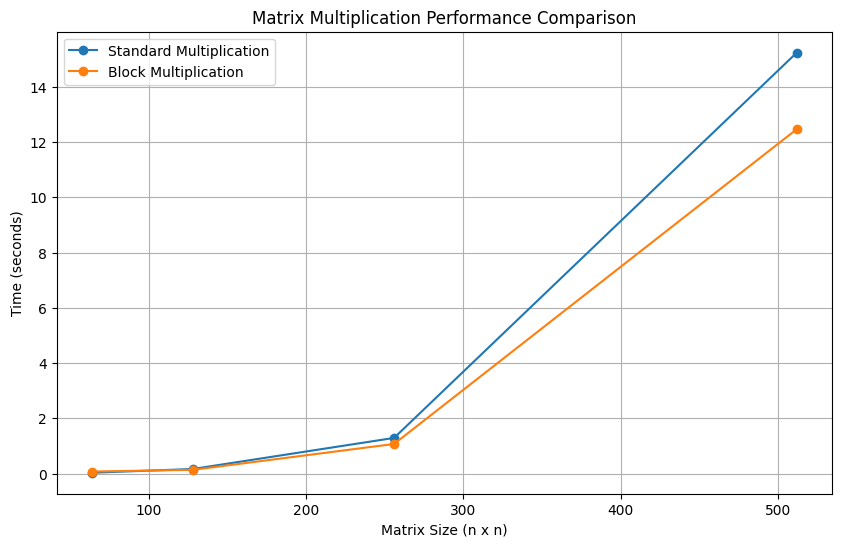

In [11]:
sizes = [64, 128, 256, 512]  # Different matrix sizes to test
block_size = 128  # Block size for optimized multiplication

standard_times = []
block_times = []

for n in sizes:
    # Generate random matrices
    A = [[random.random() for _ in range(n)] for _ in range(n)]
    B = [[random.random() for _ in range(n)] for _ in range(n)]

    # Standard matrix multiplication
    start_time = time.time()
    C_standard = standard_matrix_multiplication(A, B)
    standard_time = time.time() - start_time
    standard_times.append(standard_time)

    # Optimized block matrix multiplication
    start_time = time.time()
    C_block = block_matrix_multiplication(A, B, block_size)
    block_time = time.time() - start_time
    block_times.append(block_time)

    # Verify correctness
    if C_standard != C_block:
        print(f"The results are incorrect for matrix size {n}!")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, standard_times, label='Standard Multiplication', marker='o')
plt.plot(sizes, block_times, label='Block Multiplication', marker='o')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()